In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def visualize(data, x, y):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
    sns.stripplot(x, y, data=data, jitter=True, size=4, ax=axes[0][0])
    sns.factorplot(x=x, y=y, data=data, kind='bar', ax=axes[0][1], sharex=False, sharey=False, legend=False)
    data.boxplot(column=y, by=x, ax=axes[1][0])
    sns.violinplot(x=x, y=y, data=data, ax=axes[1][1])
    
    # Remove the extra plot that factorplot draws
    plt.close(2)
    plt.show()

In [37]:
curr_health = pd.read_csv('../2015-2016_nhanes_raw/questionnaire/current_health.csv',
                         usecols=['SEQN', 'HSD010', 'HSQ500'])

sex_hormones = pd.read_csv('../2015-2016_nhanes_raw/laboratory/sex_steroid_hormone.csv',
                          usecols=['SEQN', 'LBXTST', 'LBXEST', 'LBXSHBG'])

biochem_profile = pd.read_csv('../2015-2016_nhanes_raw/laboratory/standard_biochem_profile.csv',
                             usecols=['SEQN', 'LBXSBU', 'LBXSC3SI', 'LBXSCA',
                                      'LBXSCH', 'LBXSCLSI', 'LBXSGL',
                                      'LBXSIR', 'LBXSKSI', 'LBXSNASI', 
                                      'LBXSTP', 'LBXSTR', 'LBXSUA'])

glycohemoglobin = pd.read_csv('../2015-2016_nhanes_raw/laboratory/glycohemoglobin.csv')

In [39]:
def happiness_transform(level):
    if (level == 1 or level == 2):
        return 1
    elif (level == 4 or level == 5):
        return 3
    else:
        return 2
    

curr_health['happiness_3'] = curr_health['HSD010'].apply(lambda x: happiness_transform(x))

In [43]:
display(curr_health.HSD010.value_counts())
curr_health.dropna().happiness_3.value_counts()

3.0    2493
2.0    1652
4.0    1212
1.0     606
5.0     203
Name: HSD010, dtype: int64

2    2493
1    2258
3    1415
Name: happiness_3, dtype: int64

In [44]:
joined_a = curr_health
joined_b = pd.merge(joined_a, sex_hormones, on='SEQN')
joined_c = pd.merge(joined_b, glycohemoglobin, on='SEQN')
joined_d = pd.merge(joined_c, folate, on='SEQN')
joined = pd.merge(joined_d, biochem_profile, on='SEQN')

In [45]:
joined.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5482 entries, 0 to 6743
Data columns (total 23 columns):
SEQN           5482 non-null float64
HSD010         5482 non-null float64
HSQ500         5482 non-null float64
happiness_3    5482 non-null int64
LBXTST         5482 non-null float64
LBXEST         5482 non-null float64
LBXSHBG        5482 non-null float64
LBXGH          5482 non-null float64
LBDFOTSI       5482 non-null float64
LBXSF1SI       5482 non-null float64
LBXSF2SI       5482 non-null float64
LBXSBU         5482 non-null float64
LBXSC3SI       5482 non-null float64
LBXSCA         5482 non-null float64
LBXSCH         5482 non-null float64
LBXSCLSI       5482 non-null float64
LBXSGL         5482 non-null float64
LBXSIR         5482 non-null float64
LBXSKSI        5482 non-null float64
LBXSNASI       5482 non-null float64
LBXSTP         5482 non-null float64
LBXSTR         5482 non-null float64
LBXSUA         5482 non-null float64
dtypes: float64(22), int64(1)
memory usage: 

In [46]:
display(joined.groupby('HSD010').mean())
print('\n')
joined.groupby('HSD010').std()

,SEQN,HSQ500,happiness_3,LBXTST,LBXEST,LBXSHBG,LBXGH,LBDFOTSI,LBXSF1SI,LBXSF2SI,...,LBXSCA,LBXSCH,LBXSCLSI,LBXSGL,LBXSIR,LBXSKSI,LBXSNASI,LBXSTP,LBXSTR,LBXSUA
HSD010,,,,,,,,,,,,,,,,,,,,,
1.0,88710.369637,1.886139,1,263.812450,112.507952,66.978302,5.434116,44.982473,41.102527,2.656258,...,9.428364,180.745455,103.425455,92.647273,85.621818,3.969491,138.854545,7.176545,119.347273,5.142182
2.0,88801.686441,1.869249,1,223.719564,82.619318,65.273958,5.502519,43.746885,40.846304,1.670894,...,9.402731,184.217165,103.332250,95.730819,84.050098,3.960286,138.704811,7.178218,128.059818,5.192653
3.0,88661.374649,1.863618,2,214.741788,83.832546,61.289890,5.727740,42.377061,39.658063,1.604177,...,9.368814,188.425886,103.384812,101.885666,80.451324,3.943844,138.754266,7.198635,152.787698,5.418454
4.0,88781.041254,1.828383,3,198.223128,51.652241,54.752121,6.158930,41.229215,38.450591,1.736438,...,9.343969,189.447552,103.042832,115.106643,76.411199,3.960734,138.472028,7.223050,167.090909,5.517133
5.0,88239.576355,1.807882,3,177.002031,30.254712,56.977447,6.600510,44.200000,39.060518,3.552797,...,9.358549,183.424870,102.927461,128.243523,68.077720,4.003109,138.336788,7.155208,184.082902,5.526425


,SEQN,HSQ500,happiness_3,LBXTST,LBXEST,LBXSHBG,LBXGH,LBDFOTSI,LBXSF1SI,LBXSF2SI,...,LBXSCA,LBXSCH,LBXSCLSI,LBXSGL,LBXSIR,LBXSKSI,LBXSNASI,LBXSTP,LBXSTR,LBXSUA
HSD010,,,,,,,,,,,,,,,,,,,,,
1.0,2921.705880,0.317905,0.0,262.511543,875.589350,69.588478,0.606185,27.755808,20.896848,11.603583,...,0.344294,40.357518,2.454854,25.048135,35.706896,0.327728,1.877080,0.415430,92.194562,1.286019
2.0,2892.087600,0.384243,0.0,245.527168,584.904110,59.607257,0.747173,28.371620,26.221692,5.226532,...,0.335658,41.070385,2.732634,28.495118,34.804375,0.328317,2.026818,0.447999,94.418277,1.321069
3.0,2858.380913,0.535883,0.0,238.818596,637.868516,64.244163,1.003018,32.494089,30.823093,6.793223,...,0.353224,42.928217,2.805465,36.670927,33.737332,0.321459,2.082635,0.462017,138.239937,1.429073
4.0,2886.627778,0.530104,0.0,226.223420,377.005374,38.948605,1.537680,47.780232,46.217077,6.590470,...,0.356392,46.732133,3.031030,56.166521,34.333875,0.355853,2.336351,0.465836,136.979875,1.540694
5.0,2948.933747,0.658183,0.0,231.103193,47.327897,37.349122,1.800612,52.406643,27.171406,30.209776,...,0.389500,44.023973,3.680597,73.410999,30.864779,0.379997,2.556761,0.538929,147.924225,1.692347


In [47]:
display(joined.groupby('happiness_3').mean())
print('\n')
joined.groupby('happiness_3').std()

,SEQN,HSD010,HSQ500,LBXTST,LBXEST,LBXSHBG,LBXGH,LBDFOTSI,LBXSF1SI,LBXSF2SI,...,LBXSCA,LBXSCH,LBXSCLSI,LBXSGL,LBXSIR,LBXSKSI,LBXSNASI,LBXSTP,LBXSTR,LBXSUA
happiness_3,,,,,,,,,,,,,,,,,,,,,
1,88777.178919,1.731621,1.873782,234.248036,90.496159,65.721581,5.484491,44.073155,40.913930,1.931090,...,9.409483,183.302682,103.356801,94.918582,84.464303,3.962711,138.744253,7.177778,125.764847,5.179358
2,88671.937480,3.000000,1.863618,209.643009,84.372056,61.653384,5.713210,41.999676,39.267354,1.603202,...,9.363630,188.904560,103.374647,101.071328,80.491519,3.937864,138.706568,7.211370,152.110640,5.363662
3,88703.361131,4.143463,1.825442,195.159632,48.553736,55.078456,6.222804,41.655516,38.538243,1.997081,...,9.346073,188.578160,103.026178,117.002992,75.207335,3.966851,138.452506,7.213278,169.543755,5.518474


,SEQN,HSD010,HSQ500,LBXTST,LBXEST,LBXSHBG,LBXGH,LBDFOTSI,LBXSF1SI,LBXSF2SI,...,LBXSCA,LBXSCH,LBXSCLSI,LBXSGL,LBXSIR,LBXSKSI,LBXSNASI,LBXSTP,LBXSTR,LBXSUA
happiness_3,,,,,,,,,,,,,,,,,,,,,
1,2899.700065,0.443214,0.367624,250.656969,673.686619,62.370126,0.713224,28.208987,24.922463,7.469636,...,0.338060,40.902790,2.662017,27.656426,35.042715,0.328108,1.989121,0.439556,93.894158,1.311809
2,2868.018777,0.000000,0.535883,239.302188,610.864474,63.304998,0.985921,30.944533,29.209027,6.546900,...,0.348562,43.077576,2.797252,35.249415,34.149078,0.322252,2.053777,0.463920,136.641330,1.410917
3,2900.813817,0.350668,0.550096,226.968988,349.163669,38.711947,1.585329,48.461776,43.982936,12.960652,...,0.361242,46.383394,3.131844,59.116613,33.970460,0.359600,2.368903,0.477430,138.683955,1.562829


HSQ500     -0.037151
LBXTST     -0.072844
LBXEST     -0.027895
LBXSHBG    -0.064725
LBXGH       0.243903
LBDFOTSI   -0.025634
LBXSF1SI   -0.026402
LBXSF2SI   -0.002703
LBXSBU      0.081622
LBXSC3SI   -0.019973
LBXSCA     -0.071076
LBXSCH      0.050295
LBXSCLSI   -0.039936
LBXSGL      0.199093
LBXSIR     -0.105530
LBXSKSI     0.001164
LBXSNASI   -0.050418
LBXSTP      0.024297
LBXSTR      0.137824
LBXSUA      0.092015
Name: HSD010, dtype: float64

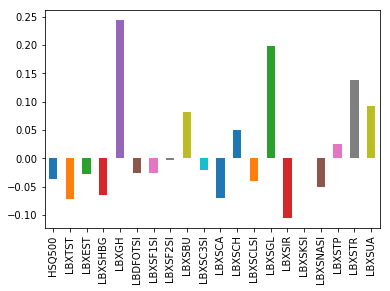

In [36]:
display(joined.corr()['HSD010'][2:])
(joined.corr()['HSD010'][2:]).plot.bar()

LBXTST     -0.060763
LBXEST     -0.024108
LBXSHBG    -0.064451
LBXGH       0.234615
LBDFOTSI   -0.027337
LBXSF1SI   -0.028404
LBXSF2SI   -0.000352
LBXSBU      0.072410
LBXSC3SI   -0.011469
LBXSCA     -0.069399
LBXSCH      0.049724
LBXSCLSI   -0.037808
LBXSGL      0.190745
LBXSIR     -0.096345
LBXSKSI    -0.001478
LBXSNASI   -0.046726
LBXSTP      0.030802
LBXSTR      0.129947
LBXSUA      0.088066
Name: happiness_3, dtype: float64

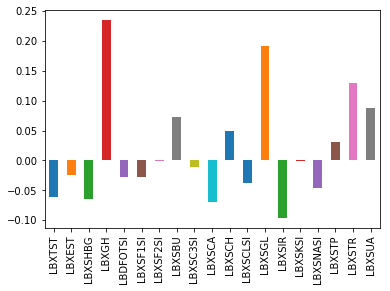

In [49]:
display(joined.corr()['happiness_3'][4:])
(joined.corr()['happiness_3'][4:]).plot.bar()

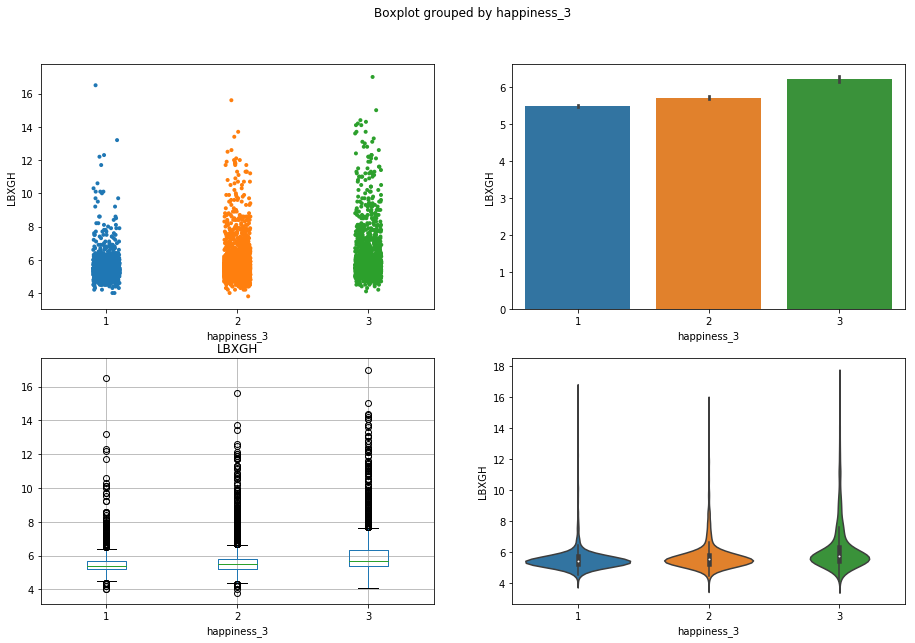

In [50]:
visualize(joined, 'happiness_3', 'LBXGH')

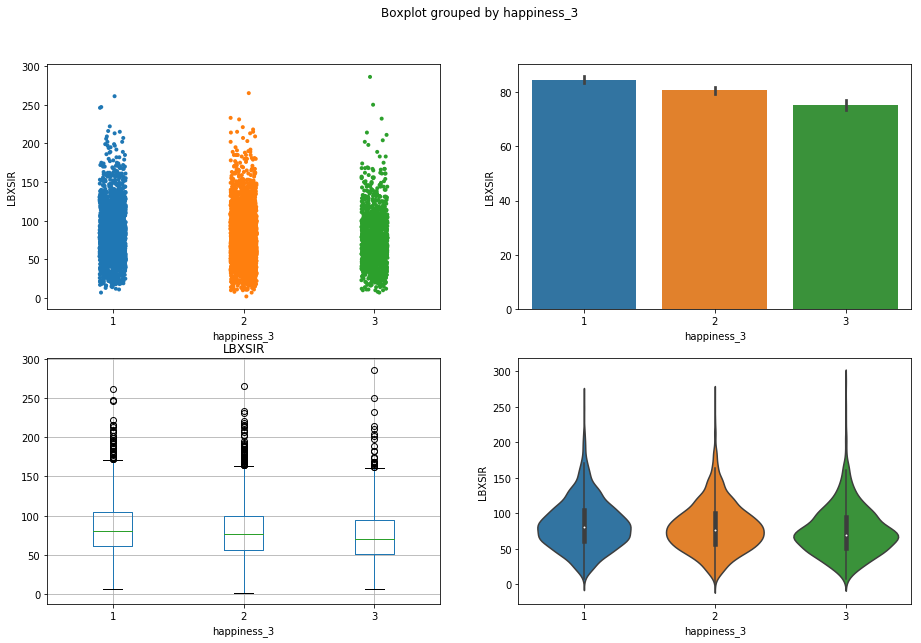

In [51]:
visualize(joined, 'happiness_3', 'LBXSIR')

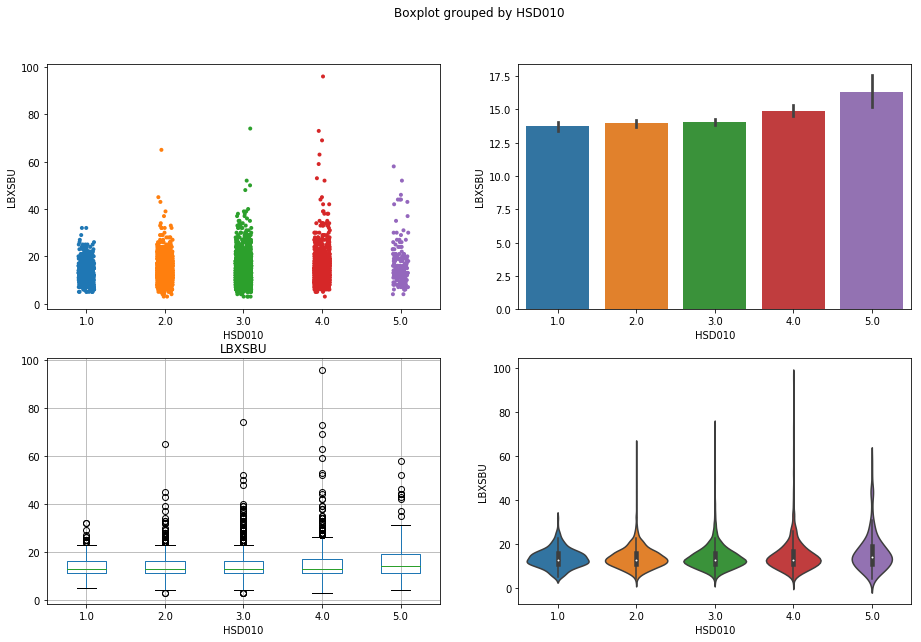

In [10]:
visualize(joined, 'HSD010', 'LBXSBU')

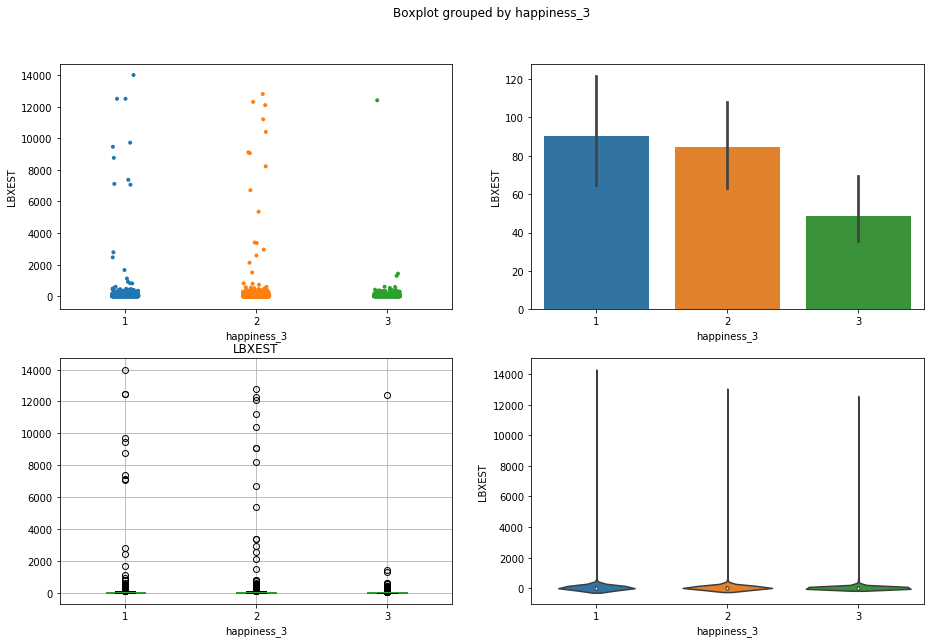

In [53]:
visualize(joined, 'happiness_3', 'LBXEST')

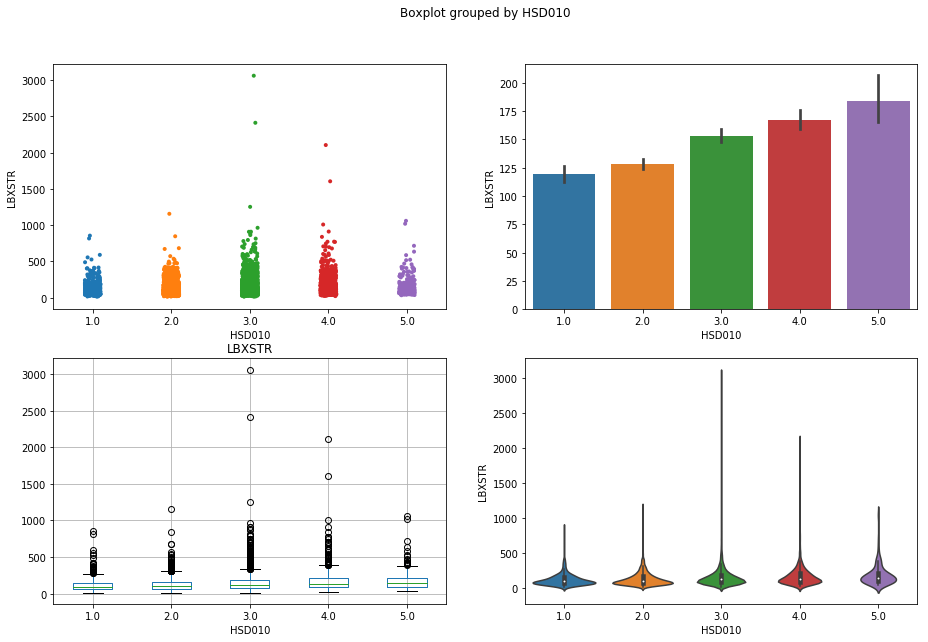

In [12]:
visualize(joined, 'HSD010', 'LBXSTR')

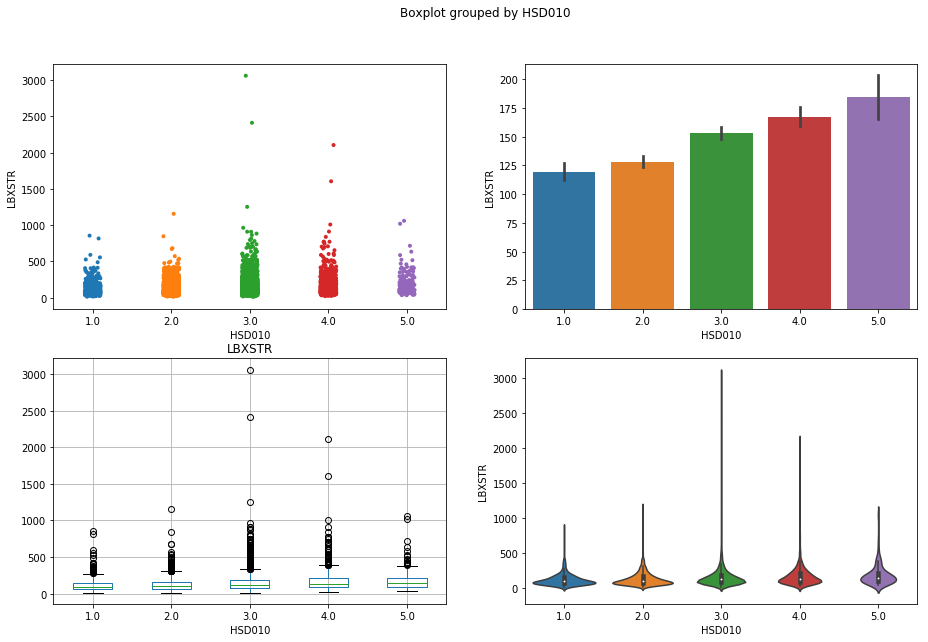

In [13]:
visualize(joined, 'HSD010', 'LBXSTR')

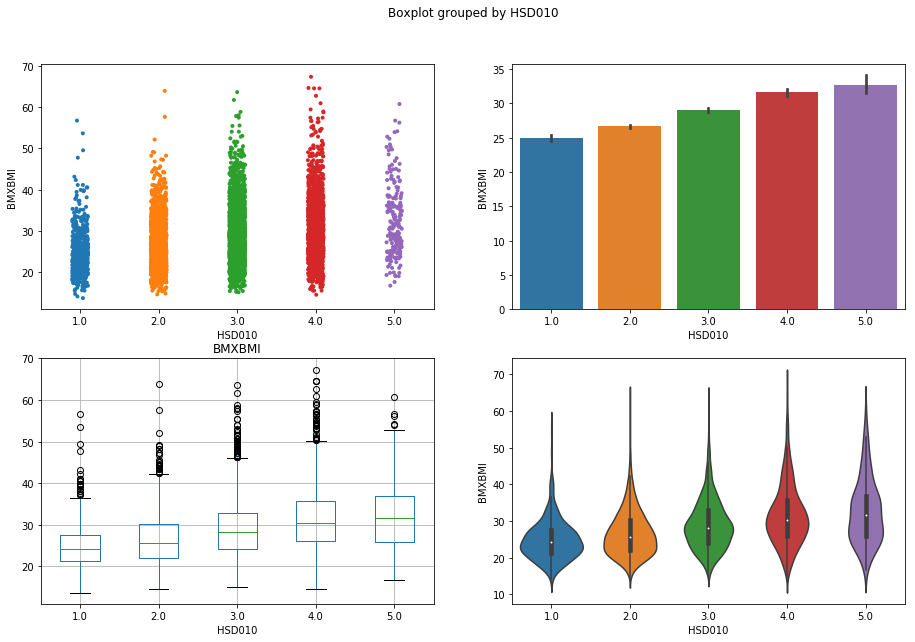

In [14]:
visualize(joined, 'HSD010', 'BMXBMI')